In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import utils

In [2]:
from radar_chart import Radar

# FUNCTIONS

In [3]:
def converter(metric, *per90):
    "function that converts all string numbers to floats, and then standardises to per90 units if metric is not already in per90 terms"
    
    #get metric, convert to float
    float_metric = float(metric.values[0])

    if per90:
    #if per 90:
       
        #divide by no. of 90s, and return the standardised format
        metric_to_return = float_metric/per90[0]
        #per 90 is a tuple of indeterminate length, if per90 is not empty, then it will contain the num of 90s value, which will be first index
    
    else:
        metric_to_return = float_metric
    
    
    return [metric_to_return]

In [4]:
def merge_dfsv1(df1, df2):
    "function to merge/concatenate the individual player's dataframes into a single dataframe"

    # Concatenate along the rows axis (stack vertically)
    big_df = pd.concat([df1, df2], ignore_index=True)
    
    new_column_data = ['Bellingham', 'Foden']
    
    # Adding the new column to the beginning of the DataFrame
    big_df.insert(0, 'Name', new_column_data)
    
    return big_df

In [5]:
def get_paramsv1(df, index):
    "function which returns the column names of a dataframe as a list. The index determines any columns to skip"
    
    params = list(df.columns)

    params = params[index:]
    #index determines index to skip /start from
    
    return params

In [6]:
#def string_converterv1(df, params):
#
#    for x in params:
#        for i in range(len(df[x])):
#            df[x][i] = float(df[x][i])
#            
#    return df

In [7]:
def range_calcv1(df, params):
    "calculates the ranges for the play radar. Given the merged dataframe, it goes through each variable/metric, finds the minimum and maximum values and ensures the range extends beyond these values."

    ranges = []
    
    # Calculate the ranges and populate a_values and b_values lists
    for x in params:
        
        a = min(df[x])
        a = a - (a * 0.25)
        
        b = max(df[x])
        b = b + (b * 0.25)
        
        ranges.append((a, b))
        
    return ranges

In [8]:
def values_calcv1(df, index):
    "calculates the actual values to plot on the player radar"

    bellingham_values = []
    foden_values = []
    
    player = df['Name']
    
    for x in range(len(player)):
        if player[x] == 'Bellingham':
            bellingham_values = df.iloc[x].values.tolist()[index:]
            #index to skip out the name and (number of 90s)

        if player[x] == 'Foden':
            foden_values = df.iloc[x].values.tolist()[index:]
            #index to skip out the name (and number of 90s)
            
    values = [bellingham_values[0:], foden_values[0:]]
            
    return values

In [9]:
def radar_plotv1(ranges, params, values):
    "plots the radar!"

    title = dict(
        title_name='Jude Bellingham',
        title_color = 'black',
        subtitle_name = 'Real Madrid',
        subtitle_color = 'red',
        title_name_2='Phil Foden',
        title_color_2 = 'black',
        subtitle_name_2 = 'Manchester City',
        subtitle_color_2 = 'blue',
        title_fontsize = 18,
        subtitle_fontsize=15
    )
    
    radar = Radar()

    fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=['red','blue'],
                         alphas=[.75,.6],title=title,
                         compare=True)
    
    return

In [10]:
def radar_pipeline(df, index = 1):
    "explain "
    
    df_params = get_paramsv1(df, index)
    df_ranges = range_calcv1(df, df_params) 
    df_values = values_calcv1(df, index)
    radar_plotv1(df_ranges, df_params, df_values)

# Scraping the Data


In [11]:
bellingham_url = 'https://fbref.com/en/players/57d88cf9/Jude-Bellingham'
bellingham_dfs = pd.read_html(bellingham_url)

foden_url = 'https://fbref.com/en/players/ed1e53f3/Phil-Foden'
foden_dfs = pd.read_html(foden_url)

# High-Level DataFrame

In [12]:
def non_standardised_refined_highlevel_df(df, i):
    #i is the index which identifies the 2023-24 season data for the player
    
    # Create an empty DataFrame
    refined_df = pd.DataFrame()
    
    
    #calculate standardiser
    no_90s = float(df[5][('Playing Time', '90s')][i:i+1].values[0])
    
    #add custom columns
    refined_df['Goals'] = converter(df[5][('Performance', 'Gls')][i:i+1])
    refined_df['Assists'] = converter(df[5][('Performance', 'Ast')][i:i+1])
    refined_df['Shot-creating Actions'] = converter(df[9][('SCA', 'SCA90')][i:i+1])
    refined_df['Pass Completion (%)'] = converter(df[7][('Total', 'Cmp%')][i:i+1])
    refined_df['Dribbles'] = converter(df[11][('Carries', 'Carries')][i:i+1])
    refined_df['Tackles'] = converter(df[10][('Tackles', 'Tkl')][i:i+1])
    refined_df['Interceptions'] = converter(df[10][('Unnamed: 19_level_0', 'Int')][i:i+1])
    
    return refined_df

In [13]:
bv1 = non_standardised_refined_highlevel_df(bellingham_dfs, 4)
fv1 = non_standardised_refined_highlevel_df(foden_dfs, 7)

In [14]:
highlevel_df = merge_dfsv1(bv1, fv1)
highlevel_df

,Name,Goals,Assists,Shot-creating Actions,Pass Completion (%),Dribbles,Tackles,Interceptions
0,Bellingham,17.0,4.0,3.67,87.8,1080.0,37.0,21.0
1,Foden,16.0,7.0,4.47,85.6,1290.0,28.0,13.0


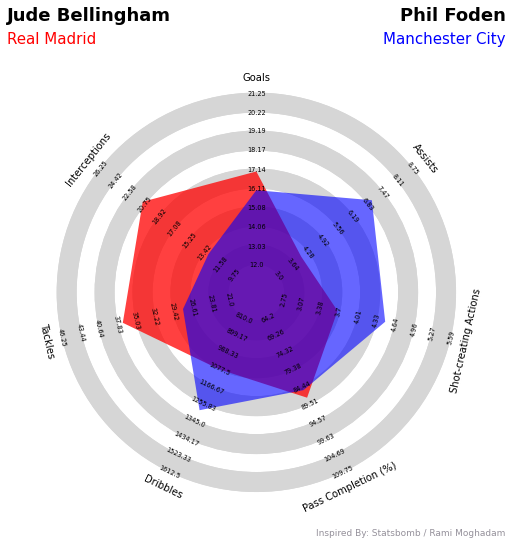

In [15]:
radar_pipeline(highlevel_df)

# Standardising

In [16]:
def refined_highlevel_df(df, i):
    #i is the index which identifies the 2023-24 season data for the player
    
    # Create an empty DataFrame
    refined_df = pd.DataFrame()
    
    
    #calculate standardiser
    no_90s = float(df[5][('Playing Time', '90s')][i:i+1].values[0])
    
    #add custom columns
    refined_df['Goals/90'] = converter(df[5][('Performance', 'Gls')][i:i+1], no_90s)
    refined_df['Assists/90'] = converter(df[5][('Performance', 'Ast')][i:i+1], no_90s)
    refined_df['Shot-creating Actions/90'] = converter(df[9][('SCA', 'SCA90')][i:i+1])
    refined_df['Pass Completion (%)'] = converter(df[7][('Total', 'Cmp%')][i:i+1])
    refined_df['Dribbles/90'] = converter(df[11][('Carries', 'Carries')][i:i+1], no_90s)
    refined_df['Tackles/90'] = converter(df[10][('Tackles', 'Tkl')][i:i+1], no_90s)
    refined_df['Interceptions/90'] = converter(df[10][('Unnamed: 19_level_0', 'Int')][i:i+1], no_90s)
    
    return refined_df

In [17]:
bv2 = refined_highlevel_df(bellingham_dfs, 4)
fv2 = refined_highlevel_df(foden_dfs, 7)

In [18]:
highlevel_df2 = merge_dfsv1(bv2, fv2)
highlevel_df2

,Name,Goals/90,Assists/90,Shot-creating Actions/90,Pass Completion (%),Dribbles/90,Tackles/90,Interceptions/90
0,Bellingham,0.726496,0.17094,3.67,87.8,46.153846,1.581197,0.897436
1,Foden,0.571429,0.25000,4.47,85.6,46.071429,1.000000,0.464286


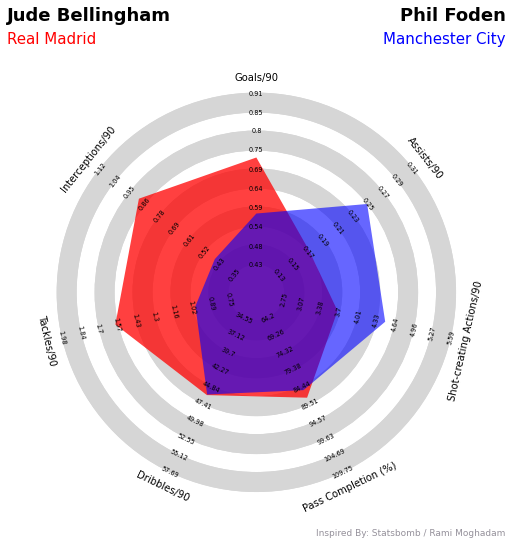

In [19]:
radar_pipeline(highlevel_df2)

# Shooting Data Deepdive

In [20]:
def refined_shooting_df(df, i):
    #i is the index which identifies the 2023-24 season data for the player
    
    # Create an empty DataFrame
    refined_df = pd.DataFrame()
    
    #calculate standardiser
    no_90s = float(df[5][('Playing Time', '90s')][i:i+1].values[0])
    
    #add custom columns
    refined_df['xG/90'] = converter(df[5][('Per 90 Minutes', 'xG')][i:i+1])
    refined_df['Non-Penalty xG/90'] = converter(df[5][('Per 90 Minutes', 'npxG')][i:i+1])
    refined_df['Goals per Shot'] = converter(df[6][('Standard', 'G/Sh')][i:i+1])
    refined_df['Avg. Shot Distance'] = converter(df[6][('Standard', 'Dist')][i:i+1])
    refined_df['Shots on Target/90'] = converter(df[6][('Standard', 'SoT/90')][i:i+1])
    refined_df['Shots on Target %'] = converter(df[6][('Standard', 'SoT%')][i:i+1])
    
    
    
    return refined_df

In [21]:
bshooting_df = refined_shooting_df(bellingham_dfs, i=4)
fshooting_df = refined_shooting_df(foden_dfs, i=7)

In [22]:
shooting_df = merge_dfsv1(bshooting_df, fshooting_df)
shooting_df

,Name,xG/90,Non-Penalty xG/90,Goals per Shot,Avg. Shot Distance,Shots on Target/90,Shots on Target %
0,Bellingham,0.45,0.42,0.29,14.6,1.28,53.6
1,Foden,0.33,0.33,0.17,18.4,1.43,43.0


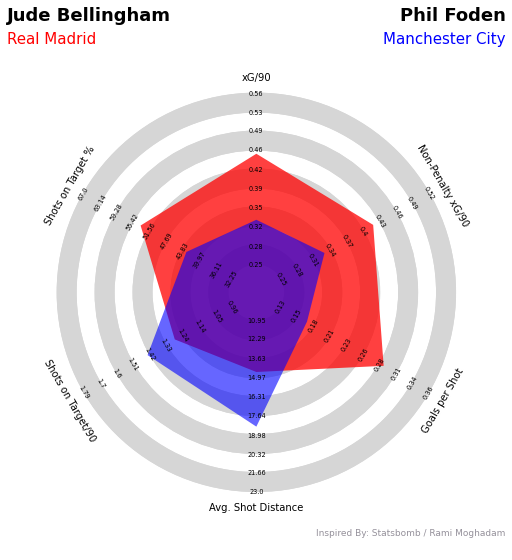

In [23]:
radar_pipeline(shooting_df)

# PASSING

In [40]:
def refined_passing_df(df, i):
    #i is the index which identifies the 2023-24 season data for the player
    
    # Create an empty DataFrame
    refined_df = pd.DataFrame()
    
    #calculate standardiser
    no_90s = float(df[5][('Playing Time', '90s')][i:i+1].values[0])
    
    #add custom columns
    refined_df['xA/90'] = converter(df[7][('Expected', 'xA')][i:i+1])
    refined_df['Progressive Passes/90'] = converter(df[7][('Unnamed: 29_level_0', 'PrgP')][i:i+1], no_90s)
    refined_df['Passes into Final Third/90'] = converter(df[7][('Unnamed: 26_level_0', '1/3')][i:i+1], no_90s)
    refined_df['Through Balls/90'] = converter(df[8][('Pass Types', 'TB')][i:i+1], no_90s)
    refined_df['Shot-creating Actions/90'] = converter(df[9][('SCA', 'SCA90')][i:i+1])
    refined_df['SCA - In-play Actions/90'] = converter(df[9][('SCA Types', 'PassLive')][i:i+1], no_90s)
    
    return refined_df

In [41]:
passing_bv1 = refined_passing_df(bellingham_dfs, i=4)
passing_fv1 = refined_passing_df(foden_dfs, i=7)

In [42]:
passing_df = merge_dfsv1(passing_bv1, passing_fv1)
passing_df

,Name,xA/90,Progressive Passes/90,Passes into Final Third/90,Through Balls/90,Shot-creating Actions/90,SCA - In-play Actions/90
0,Bellingham,3.2,7.264957,5.042735,0.683761,3.67,2.948718
1,Foden,6.4,5.392857,2.000000,0.464286,4.47,3.500000


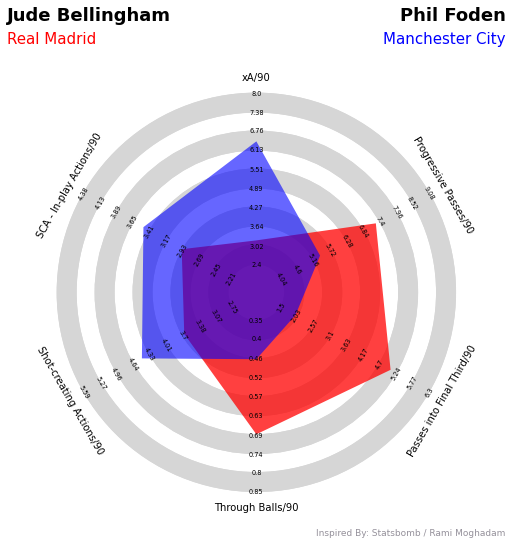

In [43]:
radar_pipeline(passing_df)

# DRIBBLING 

In [44]:
def refined_dribbling_df(df, i):
    #i is the index which identifies the 2023-24 season data for the player
    
    # Create an empty DataFrame
    refined_df = pd.DataFrame()
    
    #calculate standardiser
    no_90s = float(df[5][('Playing Time', '90s')][i:i+1].values[0])
    
    #add custom columns
    refined_df['Dribbles/90'] = converter(df[11][('Carries', 'Carries')][i:i+1], no_90s)
    refined_df['Successful Take-ons % /90'] = converter(df[11][('Take-Ons', 'Succ%')][i:i+1])
    refined_df['Progressive Dribbles/90'] = converter(df[11][('Carries', 'PrgC')][i:i+1], no_90s)
    refined_df['Dribbles into Att. Third/90'] = converter(df[11][('Carries', '1/3')][i:i+1], no_90s)
    refined_df['Touches/90'] = converter(df[11][('Touches', 'Touches')][i:i+1], no_90s)
    refined_df['Touches, Def. Third/90'] = converter(df[11][('Touches', 'Def 3rd')][i:i+1], no_90s)
    refined_df['Touches, Mid. Third/90'] = converter(df[11][('Touches', 'Mid 3rd')][i:i+1], no_90s)
    refined_df['Touches, Att. Third/90'] = converter(df[11][('Touches', 'Att 3rd')][i:i+1], no_90s)
    refined_df['Progressive Passes Received/90'] = converter(df[11][('Receiving', 'PrgR')][i:i+1], no_90s)
    
    return refined_df

In [45]:
bdribbling_df = refined_dribbling_df(bellingham_dfs, i=4)
fdribbling_df = refined_dribbling_df(foden_dfs, i=7)

In [46]:
dribbling_df = merge_dfsv1(bdribbling_df, fdribbling_df)
dribbling_df

,Name,Dribbles/90,Successful Take-ons % /90,Progressive Dribbles/90,Dribbles into Att. Third/90,Touches/90,"Touches, Def. Third/90","Touches, Mid. Third/90","Touches, Att. Third/90",Progressive Passes Received/90
0,Bellingham,46.153846,50.0,3.290598,2.735043,70.854701,7.692308,36.324786,27.991453,6.623932
1,Foden,46.071429,44.7,3.178571,2.642857,67.392857,5.714286,23.964286,38.464286,8.785714


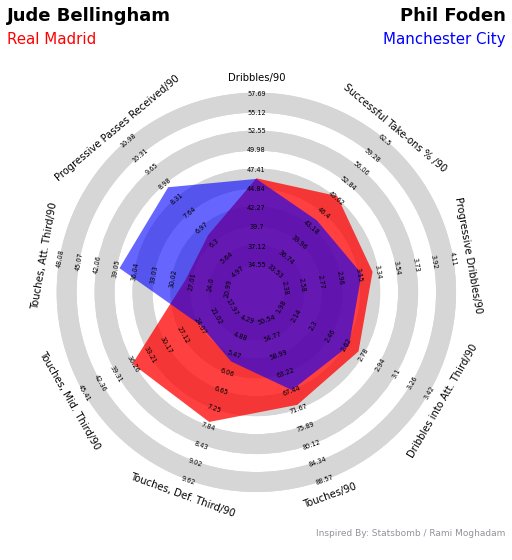

In [47]:
radar_pipeline(dribbling_df)

# DEFENDING

In [32]:
def refined_defending_df(df, i):
    #i is the index which identifies the 2023-24 season data for the player
    
    # Create an empty DataFrame
    refined_df = pd.DataFrame()
    
    #calculate standardiser
    no_90s = float(df[5][('Playing Time', '90s')][i:i+1].values[0])
    
    #add custom columns
    refined_df['Tackles Won/90'] = converter(df[10][('Tackles', 'TklW')][i:i+1], no_90s)
    refined_df['Tackles, Def. Third/90'] = converter(df[10][('Tackles', 'Def 3rd')][i:i+1], no_90s)
    refined_df['Tackles, Mid. Third/90'] = converter(df[10][('Tackles', 'Mid 3rd')][i:i+1], no_90s)
    refined_df['Tackles, Att. Third/90'] = converter(df[10][('Tackles', 'Att 3rd')][i:i+1], no_90s)
    refined_df['Interceptions/90'] = converter(df[10][('Unnamed: 19_level_0', 'Int')][i:i+1], no_90s)
    
    return refined_df

In [33]:
bdefending_df = refined_defending_df(bellingham_dfs, i=4)
fdefending_df = refined_defending_df(foden_dfs, i=7)

In [34]:
defending_df = merge_dfsv1(bdefending_df, fdefending_df)
defending_df

,Name,Tackles Won/90,"Tackles, Def. Third/90","Tackles, Mid. Third/90","Tackles, Att. Third/90",Interceptions/90
0,Bellingham,1.324786,0.470085,0.726496,0.384615,0.897436
1,Foden,0.642857,0.392857,0.321429,0.285714,0.464286


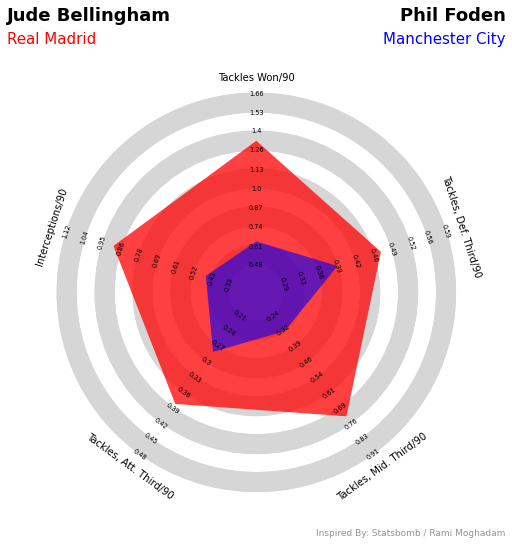

In [35]:
radar_pipeline(defending_df)